In [1]:
import numpy as np
import pandas as pd
import os
import sys
import cv2

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 

from stack_image_new import stack_images
from dataloader import split_dual_xray_image, get_contours, path2pixel
from preprocessing import get_contour_pixels, get_contour_box_image

In [2]:
from importlib import reload
import stack_image_new
reload(stack_image_new)
from stack_image_new import stack_images

In [3]:
current_dir = os.getcwd()
code_path = os.path.abspath(os.path.join(current_dir, '..', '..', 'codes'))
data_path = os.path.abspath(os.path.join(current_dir, '..', '..', 'data'))

In [4]:
from classifiers.r_method import RMethodClassifier

In [364]:
test_image = cv2.imread('/Users/zhengyun/Desktop/yaojian/codes/ore_sort_cpp-master/img/160kV_4mA_pressure_test3_forward.png', cv2.IMREAD_GRAYSCALE)
low_test, high_test = split_dual_xray_image(test_image[: :].T)
low_test, high_test = low_test.T, high_test.T

# test_image = cv2.imread('/Users/zhengyun/Desktop/yaojian/codes/ore_sort_cpp-master/img/160kV_4mA_forward.png', cv2.IMREAD_GRAYSCALE)
# low_test, high_test = split_dual_xray_image(test_image.T)
# low_test, high_test = low_test.T, high_test.T

In [365]:
R_0219 = RMethodClassifier(pixels=[low_test, high_test], truth=None, I0_low=195, I0_high=196, input= 'images', method= 'a', const= [5, 20], include_Fe = False)


In [7]:
# plt.imshow(R_0219.R_pixels[:, 250:1250], vmin=0, vmax=0.78)
# plt.colorbar()

In [8]:
# plt.imshow(R_0219.R_pixels[:, 250:1250] > 0.78)
# # plt.colorbar()

# contour test

In [226]:
low_roi.shape

(880, 800)

In [230]:
low_roi.resize

<function ndarray.resize>

In [239]:
path_0227 = os.path.join(data_path, '20250227/160kV_4mA_forward.png')

image = cv2.imread(path_0227, cv2.IMREAD_GRAYSCALE)
low, high = split_dual_xray_image(image.T) #为了与函数输入一致，先将图像transpose
low, high = low.T, high.T # 先转置回来
roi = [20, 900, 320, 1120]
y1, y2, x1, x2 = roi
low_roi, high_roi = cv2.flip(low[y1:y2, x1:x2], 0), cv2.flip(high[y1:y2, x1:x2], 0) 

low_re, high_re = cv2.resize(low_roi, (low_roi.shape[0]//4, low_roi.shape[1]//4)), cv2.resize(high_roi, (high_roi.shape[0]//4, high_roi.shape[1]//4))
low_contoured, rock_pixels, contours = get_contours(low_re, high_re, th_val = 128, max_len = 6, length=102, 
                                              direction = 'ublr', path = path_0227, s_i = 0, save_rock_image=False)


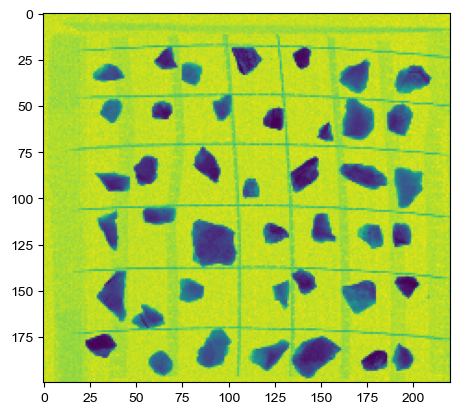

In [238]:
plt.imshow(low_re)

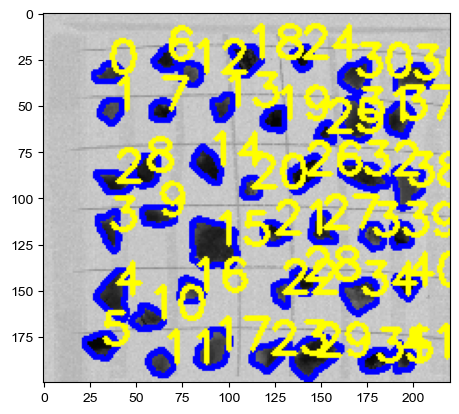

In [ ]:
cv.findContours()

# Standard Sample

In [9]:
# data_new = os.path.abspath(os.path.join(current_dir, '..', '..', 'data', '20250515'))
data_new = os.path.abspath(os.path.join(current_dir, '..', '..', 'data', '20250604'))

In [18]:
# 遍历文件夹及其子文件夹
for root, dirs, files in os.walk(data_new):
    image_data = []
    if len(files) > 1:
        # print(files)
        files.sort()
        print(files)

        for file in files:
            if file.lower().endswith('.tif'):
            #     print(root.split('/')[-1], file)
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
                image_data.append(img)
                
        if len(image_data) != 0:
            stacked_image = np.concatenate(image_data, axis=0)

            height, width = stacked_image.shape[:2]
            new_height = height // 6 + 1
            new_size = (width, new_height)
            resized_img = cv2.resize(stacked_image, new_size, interpolation=cv2.INTER_LINEAR)

            cv2.imwrite(os.path.join(root, '%s.png'%(root.split('/')[-1])), resized_img)    

['.DS_Store', 'foo130.tif', 'foo131.tif', 'foo132.tif', 'foo133.tif', 'foo134.tif', 'foo135.tif', 'foo136.tif', 'foo137.tif', 'foo138.tif', 'foo139.tif', 'foo140.tif', 'foo141.tif', 'foo142.tif', 'normalized_50_100.png']
['.DS_Store', 'foo171.tif', 'foo172.tif', 'foo173.tif', 'foo174.tif', 'foo175.tif', 'foo176.tif', 'foo177.tif', 'foo178.tif', 'foo179.tif', 'foo180.tif', 'foo181.tif', 'foo182.tif', 'unnormalized_1_50.png']
['.DS_Store', 'foo186.tif', 'foo187.tif', 'foo188.tif', 'foo189.tif', 'foo190.tif', 'foo191.tif', 'foo192.tif', 'foo193.tif', 'foo194.tif', 'foo195.tif', 'foo196.tif', 'foo197.tif', 'normalized_1_50.png']
['.DS_Store', 'foo103.tif', 'foo104.tif', 'foo105.tif', 'foo106.tif', 'foo107.tif', 'foo108.tif', 'foo109.tif', 'foo110.tif', 'foo111.tif', 'foo112.tif', 'sample_unnormalized.png']
['.DS_Store', 'foo108.tif', 'foo109.tif', 'foo110.tif', 'foo111.tif', 'foo112.tif', 'foo113.tif', 'foo114.tif', 'foo115.tif', 'foo116.tif', 'sample_normalized.png']
['.DS_Store', 'foo483

In [19]:
pt_path = os.path.join(data_path, '160kV_4mA_pressure_test3_forward.png')
pre_test = cv2.imread(pt_path, cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_UNCHANGED

In [20]:
pre_test.max()

255

In [131]:
all_unnorm = stack_images(data_path, 1, 3)
# cv2.imwrite('all_unnorm.png', all_unnorm)
all_norm = stack_images(data_path, 4, 7) 
# cv2.imwrite('all_norm.png', all_norm)
stack_norm = stack_images(data_path, 8, 10) 
# cv2.imwrite('stack_norm.png', stack_norm)

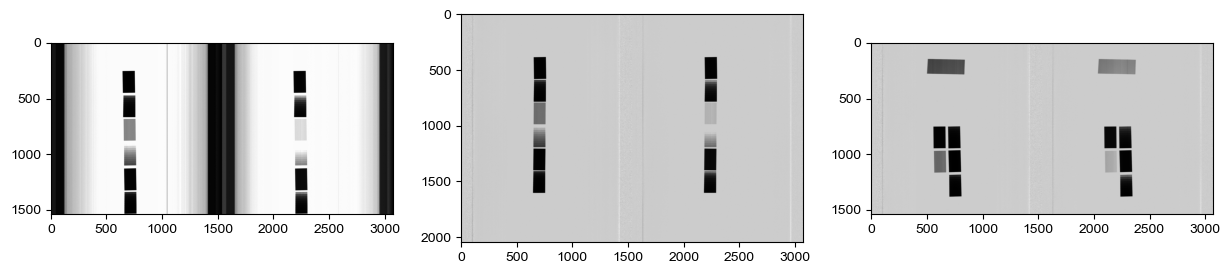

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(all_unnorm, cmap='gray')
axes[1].imshow(all_norm, cmap='gray')
axes[2].imshow(stack_norm, cmap='gray')

In [143]:
data_int16 = cv2.imread('all_unnorm.png', cv2.IMREAD_UNCHANGED)
low_ori_16, high_ori_16 = split_dual_xray_image(data_int16.T)


In [136]:
data_int8.dtype

dtype('uint16')

In [138]:
data_int8 = cv2.imread('all_unnorm.png', cv2.IMREAD_GRAYSCALE)
roi = [200, -1, 600, 800]; th_val = 175
# all_unnorm = all_unnorm.astype(np.int8)
low_ori, high_ori = split_dual_xray_image(data_int8.T)
low, high = low_ori.T[roi[0]:roi[1], roi[2]:roi[3]], high_ori.T[roi[0]:roi[1], roi[2]:roi[3]]
extra_bottom = low[0:10, :]
low, high = np.vstack((low, extra_bottom)), np.vstack((high, extra_bottom))
_, thresholded = cv2.threshold(low.copy(), th_val, 255, cv2.THRESH_BINARY)

# Find contours using cv2.RETR_TREE and cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))


cnt_filtered = []
pixels = []; r_pixels = []
for cnt in contours:
    if cv2.contourArea(cnt) > 500 and cv2.contourArea(cnt) < 50000:
        cnt_filtered.append(cnt)
cnt_filtered = sorted(cnt_filtered, key=lambda c: ((cv2.boundingRect(c)[1])))

for cnt in cnt_filtered:
    pixels_i_low = get_contour_pixels(low, cnt)
    pixels.append([pixels_i_low])

9


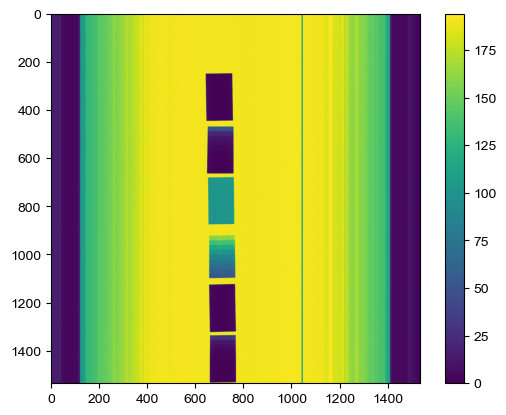

In [107]:
plt.imshow(low_ori.T)
plt.colorbar()

Text(0.5, 1.0, 'Empty image 0-220 rows')

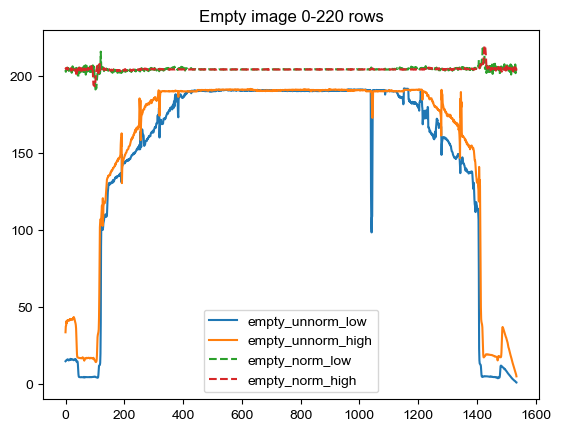

In [167]:
plt.plot(image_unnorm[0][0:200, :].mean(axis = 0), label = 'empty_unnorm_low')
# plt.plot(low_ori_16.T[0:220, :].mean(axis = 0))
plt.plot(image_unnorm[1][0:200, :].mean(axis = 0), label = 'empty_unnorm_high')

plt.plot(image_norm[0][0:200, :].mean(axis = 0), '--', label = 'empty_norm_low')
plt.plot(image_norm[1][0:200, :].mean(axis = 0), '--', label = 'empty_norm_high')
plt.legend()
plt.title('Empty image 0-220 rows')

Text(0.5, 1.0, 'Empty image 0-220 rows')

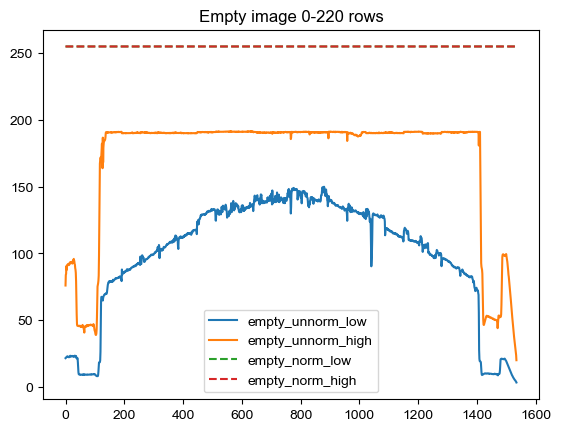

In [317]:
plt.plot(small_focal_unnorm[2][0][-200:-1, :].mean(axis = 0), label = 'empty_unnorm_low')
# plt.plot(low_ori_16.T[0:220, :].mean(axis = 0))
plt.plot(small_focal_unnorm[2][1][0:200, :].mean(axis = 0), label = 'empty_unnorm_high')

plt.plot(small_focal[2][0][-200:-1, :].mean(axis = 0), '--', label = 'empty_norm_low')
plt.plot(small_focal[2][1][-200:-1, :].mean(axis = 0), '--', label = 'empty_norm_high')
plt.legend()
plt.title('Empty image 0-220 rows')

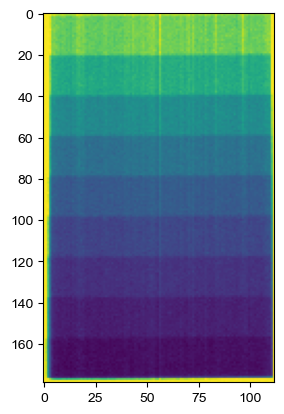

In [213]:
plt.imshow(box_norm[3][0])

Text(0.5, 1.0, 'High')

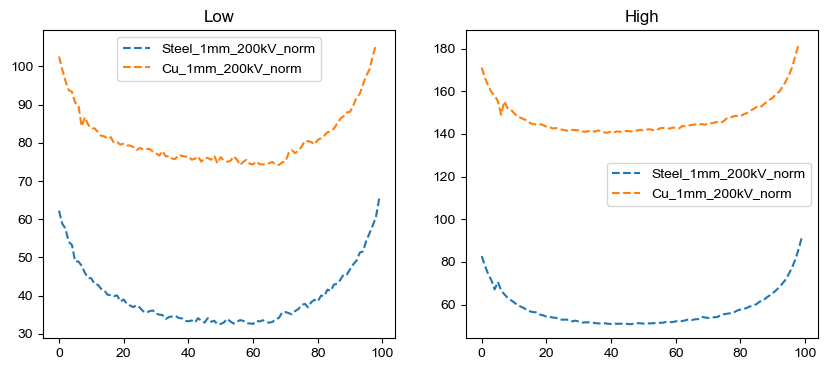

In [311]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for k in range(2):
    for i in [0, 2]:
        # 0,4 for old images; 0, 2 for small focal images
        if i == 0:
            material = 'Steel'
        elif i == 2:
            material = 'Cu'
        # axes[k].plot(box_unnorm[i][k][10:-10, 5:-5].mean(axis = 0), label = material + '_unnorm')
        # axes[k].plot(box_norm[i][k][10:-10, 5:-5].mean(axis = 0), '--', label = material + '_norm')
        axes[k].plot(small_focal[-1][i][k][10:-10, 5:-5].mean(axis = 0), '--', label = material + '_1mm_200kV_norm')
        # axes[k].plot(small_focal_unnorm[-1][int(i*2)][k][10:-10, 5:-5].mean(axis = 0), label = material + '_1mm_200kV_unnorm')
        axes[k].legend()
axes[0].set_title('Low')
axes[1].set_title('High')

In [314]:
small_focal = get_bricks(path = '200kV_4mA_1mm_norm.png', roi = [200, -1, 600, 900], th_val = 210)
small_focal_unnorm = get_bricks(path = '200kV_4mA_1mm_unnorm.png', roi = [200, -1, 700, 900], th_val = 100)

249.83269583333333 247.48891333333333
(1309, 300) (1309, 300)
37
115.96415416666666 190.66257333333334
(1309, 200) (1309, 200)
6


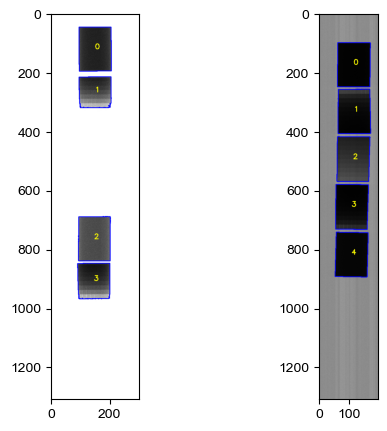

In [315]:
fig, axes = plt.subplots(1, 2, figsize=(6, 5))
axes[0].imshow(small_focal[1])
axes[1].imshow(small_focal_unnorm[1])

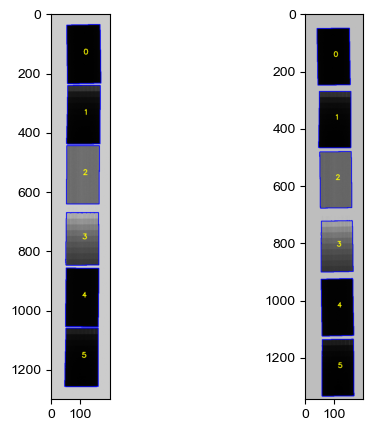

In [326]:
fig, axes = plt.subplots(1, 2, figsize=(6, 5))
axes[0].imshow(contoured_norm[150:1450, :]) 
axes[1].imshow(contoured_unnorm)

In [ ]:

def get_bricks(path = 'all_unnorm.png', roi = [200, -1, 600, 800], th_val = 175):
    data_int8 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    print(data_int8[0:300, 200:1000].mean(), data_int8[0:300, 2000:2500].mean())
    # all_unnorm = all_unnorm.astype(np.int8)
    low_ori, high_ori = split_dual_xray_image(data_int8.T)
    low, high = low_ori.T[roi[0]:roi[1], roi[2]:roi[3]], high_ori.T[roi[0]:roi[1], roi[2]:roi[3]]
    extra_bottom = low[0:10, :]
    low, high = np.vstack((low, extra_bottom)), np.vstack((high, extra_bottom))

    r_image = compute_R(low, high, I0_low = 195, I0_high = 196, 
                     input = 'images', method = 'a', const = [5, 20])
    print(low.shape, r_image.shape)
    _, thresholded = cv2.threshold(low.copy(), th_val, 255, cv2.THRESH_BINARY)

    # Find contours using cv2.RETR_TREE and cv2.CHAIN_APPROX_SIMPLE
    contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))
    contoured = cv2.cvtColor(low, cv2.COLOR_GRAY2BGR).copy()
    contoured_r = r_image.copy() #cv2.cvtColor(r_image, cv2.COLOR_GRAY2BGR).copy()

    cnt_filtered = []
    pixels = []; r_pixels = []
    for cnt in contours:
        if cv2.contourArea(cnt) > 500 and cv2.contourArea(cnt) < 50000:
            cnt_filtered.append(cnt)
    cnt_filtered = sorted(cnt_filtered, key=lambda c: ((cv2.boundingRect(c)[1])))

    box_images = []

    for cnt in cnt_filtered:
        pixels_i_low, pixels_i_high, r_values_i = get_contour_pixels(low, cnt), get_contour_pixels(high, cnt), get_contour_pixels(r_image, cnt)
        pixels.append([pixels_i_low, pixels_i_high]); r_pixels.append(r_values_i)
        # print(len(pixels_i_low), len(pixels_i_high), len(r_values_i))

        box_low, box_high, box_r= get_contour_box_image(low, cnt, margin = 0), get_contour_box_image(high, cnt, margin = 0), get_contour_box_image(r_image, cnt, margin = 0)
        box_images.append([box_low, box_high, box_r])

    _ = cv2.drawContours(contoured, cnt_filtered, -1, (0, 0, 255), 2)
    _ = cv2.drawContours(contoured_r, cnt_filtered, -1, (0, 0, 255), 2)
    for contour, text_i in zip(cnt_filtered, np.arange(6)):
        # Calculate the centroid of the contour
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        # Put the index number near the contour
        cv2.putText(contoured, str(text_i), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)

    # plt.imshow(thresholded, cmap='gray')
    # plt.colorbar()

    return pixels, contoured, [low_ori.T, high_ori.T], r_pixels, contoured_r, box_images


In [176]:
all_unnorm, contoured_unnorm, image_unnorm, r_pixels_unnorm, contoured_r_unnorm, box_unnorm = get_bricks('all_unnorm.png', roi = [200, -1, 600, 800], th_val = 175)


179.84055 184.13007333333334
(1345, 200) (1345, 200)
9


204.26615 204.19745333333333
(1857, 200) (1857, 200)
13
180.56735416666666 182.45096666666666
(945, 500) (945, 500)
9


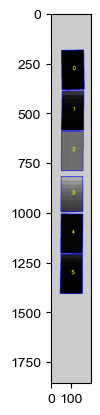

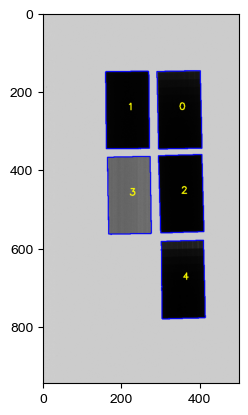

In [177]:
all_norm, contoured_norm, image_norm, r_pixels_norm, contoured_r_norm, box_norm = get_bricks('all_norm.png', roi = [200, -1, 600, 800], th_val = 191)
plt.figure()
plt.imshow(contoured_norm, cmap='gray')

stack_norm, contoured_stack_norm, image_stack_norm, r_pixels_stack_norm, contoured_r_stack_norm, box_stack_norm = get_bricks('stack_norm.png', roi = [600, -1, 400, 900], th_val = 191)
plt.figure()
plt.imshow(contoured_stack_norm, cmap='gray')

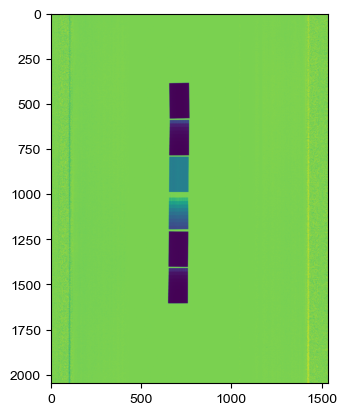

In [305]:
plt.imshow(image_norm[0])

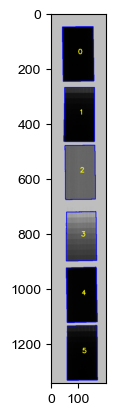

In [348]:
plt.imshow(contoured_unnorm, cmap='gray')


In [35]:
def compute_R(low, high, I0_low = 195, I0_high = 196, input = 'images', method = 'a', const = [5, 20]):

    '''
    input: 'images' or 'pixels', whole images of low and high energy or pixels of rocks
    
    '''

    if input == 'images':
        if method == 'a':
            return np.log(I0_low/(low+1e-6) + const[0] )/np.log(I0_high/(high+1e-6) + const[1])

        elif method == 'b':
            return np.log((low + 1e-6))/(np.log(high+1e-6 + 200.0))
        
    elif input == 'pixels':
        R_values = []
        for i in range(len(low)):

            if method == 'a':
                R_i =np.log(I0_low/(low[i]+1e-6) + const[0] )/np.log(I0_high/(high[i]+1e-6) + const[1])

            elif method == 'b':
                R_i = np.log((low[i] + 1e-6))/(np.log(high[i]+1e-6 + 200.0))   
            R_values.append(R_i)

        return R_values

In [344]:
for r_pixel in r_pixels_norm:
    print(r_pixel.mean(), r_pixel.std())

1.0714251121734493 0.1440268002124499
1.0005351480940423 0.1764426729070355
0.6258526811099594 0.007836845073817876
0.6384684797235727 0.031194964529118064
1.1097183756955482 0.14147466737546086
1.0217293935526772 0.17783624109503915


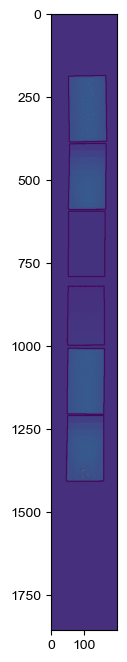

In [346]:
plt.figure(figsize=(10, 8))
plt.imshow(contoured_r_norm)